In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [33]:
clean_standings = pd.read_csv('../data/source/2023_premier_league_standings.csv', index_col=0)
clean_standings

,position,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team.id,team.name,form_value
0,1,16,11,4,1,37,36,15,21,64,Liverpool FC,4
1,2,16,11,3,2,36,33,15,18,57,Arsenal FC,3
2,3,16,11,2,3,35,35,20,15,58,Aston Villa FC,4
3,4,16,10,3,3,33,38,18,20,65,Manchester City FC,0
4,5,16,9,3,4,30,33,23,10,73,Tottenham Hotspur FC,-2
5,6,16,9,0,7,27,18,21,-3,66,Manchester United FC,1
6,7,16,8,2,6,26,33,21,12,67,Newcastle United FC,-1
7,8,16,7,5,4,26,33,28,5,397,Brighton & Hove Albion FC,1
8,9,16,7,3,6,24,26,30,-4,563,West Ham United FC,2
9,10,16,7,2,7,23,20,20,0,62,Everton FC,3


### Correlation Matrix

Below is the code for our correlation matrix. Some of these values are already challenging my intial beliefs. For example, we see that the number of wins being inversely proportional to the table position of the team, but the number of losses plays a bigger part in the table position. Another piece of data that challenged my preconcieved notions was the impact of goal difference. If we look at the standings in the above cell, we see that a team like Manchester United has a -3 goal difference, yet is still in 5th (12/16/2023), while more of the other teams in the top half of the table have a positive goal differential. 

In [34]:

corr_matrix = clean_standings.drop(['team.name'], axis=1).corr()
corr_matrix

,position,playedGames,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team.id,form_value
position,1.000000,NaN,-0.989700,0.169159,0.927910,-0.986620,-0.871595,0.830331,-0.934414,0.505068,-0.616145
playedGames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
won,-0.989700,NaN,1.000000,-0.212441,-0.921015,0.991293,0.840985,-0.828151,0.914792,-0.486359,0.667114
draw,0.169159,NaN,-0.212441,1.000000,-0.184974,-0.081919,0.119177,0.034093,0.055574,0.334472,-0.192351
lost,0.927910,NaN,-0.921015,-0.184974,1.000000,-0.964288,-0.893285,0.819281,-0.942159,0.355801,-0.594240
points,-0.986620,NaN,0.991293,-0.081919,-0.964288,1.000000,0.873797,-0.840054,0.940503,-0.450975,0.654483
goalsFor,-0.871595,NaN,0.840985,0.119177,-0.893285,0.873797,1.000000,-0.663484,0.930662,-0.395346,0.483010
goalsAgainst,0.830331,NaN,-0.828151,0.034093,0.819281,-0.840054,-0.663484,1.000000,-0.891228,0.552760,-0.402147
goalDifference,-0.934414,NaN,0.914792,0.055574,-0.942159,0.940503,0.930662,-0.891228,1.000000,-0.509971,0.489461
team.id,0.505068,NaN,-0.486359,0.334472,0.355801,-0.450975,-0.395346,0.552760,-0.509971,1.000000,-0.017147


#### Goal differential vs position plot
To gain further insight into a phenomena that is challenging my preconcieved notions, I want to plot the goal differential against the table position of a team and see the shape of the distribution. What we see is that there is a negative linear relationship with Manchester United and West Ham United FC being the extreme outliers to the data. Given that this is just a project for fun, I have opted to use seaborn's regression plot to obtain our regression line and confidence intervals (shaded areas).

<Axes: title={'center': 'Goal Differential VS Table Position'}, xlabel='goalDifference', ylabel='position'>

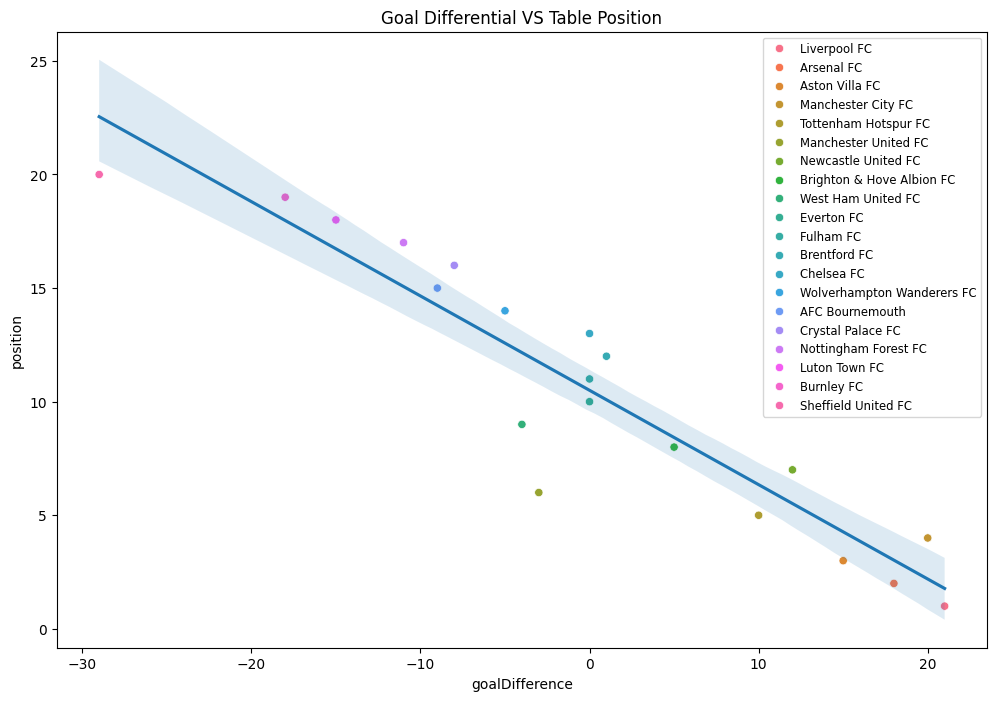

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='goalDifference', y='position', hue='team.name', data=clean_standings)
plt.legend(loc='upper right', fontsize='small')
plt.title('Goal Differential VS Table Position')

sns.regplot(x='goalDifference', y='position', data=clean_standings, scatter=False)

#### Network Graph of Matchups

In this next plot, we will take a look at the interactions between teams up until this point in the season (currently 16 of 38 games in the 2023-2024 season). In order to create this plot, we will need to bring in our match data set.

In [36]:
match_df = pd.read_csv('../data/source/2023_premier_league_match_data_matches.csv', index_col=0)
match_df.head()


,id,date_played,home_team_id,home_team_name,away_team_id,away_team_name,winner,home_goals,away_goals
0,435943,2023-08-11T19:00:00Z,328,Burnley FC,65,Manchester City FC,AWAY_TEAM,0.0,3.0
1,435944,2023-08-12T12:00:00Z,57,Arsenal FC,351,Nottingham Forest FC,HOME_TEAM,2.0,1.0
2,435945,2023-08-12T14:00:00Z,1044,AFC Bournemouth,563,West Ham United FC,DRAW,1.0,1.0
3,435946,2023-08-12T14:00:00Z,397,Brighton & Hove Albion FC,389,Luton Town FC,HOME_TEAM,4.0,1.0
4,435947,2023-08-12T14:00:00Z,62,Everton FC,63,Fulham FC,AWAY_TEAM,0.0,1.0
